# Imports e dependências

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

import pickle

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

from sklearn import tree

from collections import Counter

# Carregamento de dados e formatação para uso

### Obter dados do arquivo

In [111]:
dados = pd.read_csv('Dados/titanic.csv', sep=';', na_values=["", " ", "NA", "N/A"])

In [112]:
dados

,"PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked"
0,"1,0,3,""Braund, Mr. Owen Harris"",male,22,1,0,A/..."
1,"2,1,1,""Cumings, Mrs. John Bradley (Florence Br..."
2,"3,1,3,""Heikkinen, Miss. Laina"",female,26,0,0,S..."
3,"4,1,1,""Futrelle, Mrs. Jacques Heath (Lily May ..."
4,"5,0,3,""Allen, Mr. William Henry"",male,35,0,0,3..."
...,...
886,"887,0,2,""Montvila, Rev. Juozas"",male,27,0,0,21..."
887,"888,1,1,""Graham, Miss. Margaret Edith"",female,..."
888,"889,0,3,""Johnston, Miss. Catherine Helen """"Car..."
889,"890,1,1,""Behr, Mr. Karl Howell"",male,26,0,0,11..."


### Separação dos dados em colunas

In [113]:
dados = dados['PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked'].str.split(',', expand=True)

In [114]:
dados

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,3,"""Braund","Mr. Owen Harris""",male,22,1,0,A/5 21171,7.25,,S
1,2,1,1,"""Cumings","Mrs. John Bradley (Florence Briggs Thayer)""",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"""Heikkinen","Miss. Laina""",female,26,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"""Futrelle","Mrs. Jacques Heath (Lily May Peel)""",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"""Allen","Mr. William Henry""",male,35,0,0,373450,8.05,,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"""Montvila","Rev. Juozas""",male,27,0,0,211536,13,,S
887,888,1,1,"""Graham","Miss. Margaret Edith""",female,19,0,0,112053,30,B42,S
888,889,0,3,"""Johnston","Miss. Catherine Helen """"Carrie""""""",female,,1,2,W./C. 6607,23.45,,S
889,890,1,1,"""Behr","Mr. Karl Howell""",male,26,0,0,111369,30,C148,C


In [115]:

dados.columns = ['PassengerId', 'Survived', 'Pclass', 'Surname', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [116]:
dados

,PassengerId,Survived,Pclass,Surname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"""Braund","Mr. Owen Harris""",male,22,1,0,A/5 21171,7.25,,S
1,2,1,1,"""Cumings","Mrs. John Bradley (Florence Briggs Thayer)""",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"""Heikkinen","Miss. Laina""",female,26,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"""Futrelle","Mrs. Jacques Heath (Lily May Peel)""",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"""Allen","Mr. William Henry""",male,35,0,0,373450,8.05,,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"""Montvila","Rev. Juozas""",male,27,0,0,211536,13,,S
887,888,1,1,"""Graham","Miss. Margaret Edith""",female,19,0,0,112053,30,B42,S
888,889,0,3,"""Johnston","Miss. Catherine Helen """"Carrie""""""",female,,1,2,W./C. 6607,23.45,,S
889,890,1,1,"""Behr","Mr. Karl Howell""",male,26,0,0,111369,30,C148,C


### Remoção de atributos sem significado na análise

In [117]:
# PassengerId é condizente com a própria numeração na tabela
dados = dados.drop(columns=['PassengerId'])
# Nome é um atributo sempre único e sem impacto na sobrevivência do passageiro
dados = dados.drop(columns=['Surname', 'Name'])
# Ticket talvez seja irrelevante (supondo que não reflete fatores como localização e outros)
dados = dados.drop(columns=['Ticket'])

### Codificação de atributos

##### Atributos binários

In [118]:
cols_label_encode = ['Sex']
dados[cols_label_encode] = dados[cols_label_encode].apply(LabelEncoder().fit_transform)

##### Codificação do atributo 'Embarked'

In [119]:
for i in range(len(dados)):
    if   dados['Embarked'][i] == "C":
        dados.loc[i, 'Embarked'] = 0
    elif dados['Embarked'][i] == "Q":
        dados.loc[i, 'Embarked'] = 1
    elif dados['Embarked'][i] == "S":
        dados.loc[i, 'Embarked'] = 2

##### Codificação do atributo 'Cabin'

In [120]:
for i in range(len(dados)):
    if  ( len(dados['Cabin'][i]) > 0 ):
        cabine = dados['Cabin'][i][0]
        #print(cabine, "    ", ord(cabine))
        dados.loc[i, 'Cabin'] = ( ord(cabine) - 65 )

### Tratamento de dados vazios

In [121]:
dados

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22,1,0,7.25,,2
1,1,1,0,38,1,0,71.2833,2,0
2,1,3,0,26,0,0,7.925,,2
3,1,1,0,35,1,0,53.1,2,2
4,0,3,1,35,0,0,8.05,,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,,2
887,1,1,0,19,0,0,30,1,2
888,0,3,0,,1,2,23.45,,2
889,1,1,1,26,0,0,30,2,0


In [122]:
# Obter moda e inserir no lugar
for column in dados.columns:
    grupo = dados[column]

    # Determinar moda
    moda = Counter(grupo).most_common(1)[0][0]
    if not moda:
        moda = Counter(grupo).most_common(2)[1][0]
    print("Moda de ", column, "é ", moda)

    # Preencher dados vazios
    dados[column] = dados[column].fillna(moda)
    for linha in range(len(dados)):
        if ( type(dados[column][linha]) == str ):
            if not ( len(dados[column][linha]) > 0 ):
                #print ("Str: ", linha, dados[column][linha])
                dados.loc[linha, column] = ( moda )
                #print ("Str (new): ", linha, dados[column][linha])
        elif ( type(dados[column][linha]) == int ):
            if not ( dados[column][linha] >= 0 ):
                #print ("Int: ", linha, dados[column][linha])
                dados.loc[linha, column] = ( moda )
                #print ("Int (new): ", linha, dados[column][linha])


Moda de  Survived é  0
Moda de  Pclass é  3
Moda de  Sex é  1
Moda de  Age é  24
Moda de  SibSp é  0
Moda de  Parch é  0
Moda de  Fare é  8.05
Moda de  Cabin é  2
Moda de  Embarked é  2


### Dados totalmente codificados

In [123]:
#for i in range(len(dados)):
#    for j in dados.columns:
#        print ( type(dados[j][i]) )
#        if ( type(dados[j][i]) == str ):
#            print ( dados[j][i] )
dados

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22,1,0,7.25,2,2
1,1,1,0,38,1,0,71.2833,2,0
2,1,3,0,26,0,0,7.925,2,2
3,1,1,0,35,1,0,53.1,2,2
4,0,3,1,35,0,0,8.05,2,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,2,2
887,1,1,0,19,0,0,30,1,2
888,0,3,0,24,1,2,23.45,2,2
889,1,1,1,26,0,0,30,2,0


### Separação de dados para treino e teste

In [124]:
# Separação de dados de atributo da conclusão desses
x_prev= dados.drop(columns=['Survived'])    # Atributos
y_classe = dados.iloc[:, [0]]               # Conclusão

# Separar dados em treino e teste
# (parte é usada para treinar a árvore, os demais servem para testes futuros do modelo)
x_treino, x_teste, y_treino, y_teste = train_test_split(x_prev, y_classe, test_size = 0.20, random_state = 42)

### Salvar dados formatados em novo arquivo

In [125]:
with open('Dados/Titanic.pkl', mode = 'wb') as f:
    pickle.dump([x_treino, x_teste, y_treino, y_teste], f)

#  Criar árvore com base de dados

In [126]:

# Abrir dados formatados de arquivo e transferir para variáveis
with open('Dados/Titanic.pkl', 'rb') as f:
    x_treino, x_teste, y_treino, y_teste = pickle.load(f)

# Definir critério da árvore como sendo entropia
modelo = DecisionTreeClassifier(criterion='entropy')

Y = modelo.fit(x_treino, y_treino)


# Testar modelo

### Testar árvore

In [127]:
previsoes = modelo.predict(x_teste)

### Obter acurácia do teste

In [128]:
accuracy_score(y_teste, previsoes)

0.7821229050279329

### Matriz de confusão

In [129]:
confusion_matrix(y_teste, previsoes)

array([[85, 20],
       [19, 55]])

c:\Linguagens\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,estimator,DecisionTreeC...ion='entropy')
,ax,<Axes: >
,sample_weight,None
,percent,False
,classes,None
,encoder,None
,cmap,<matplotlib.c...00204DFD5EB10>
,fontsize,None
,is_fitted,'auto'
,force_model,False
,criterion,'entropy'


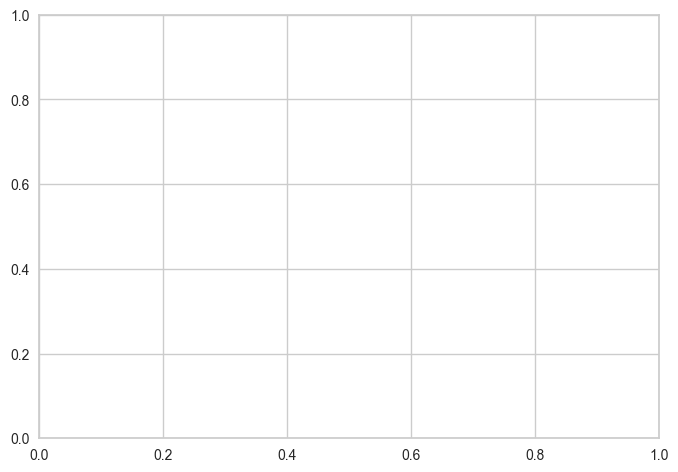

In [130]:
cm = ConfusionMatrix(modelo)
cm.fit(x_treino, y_treino)

In [131]:
cm.score(x_teste, y_teste)

0.7821229050279329

In [132]:

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.73      0.74      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



# Resultado

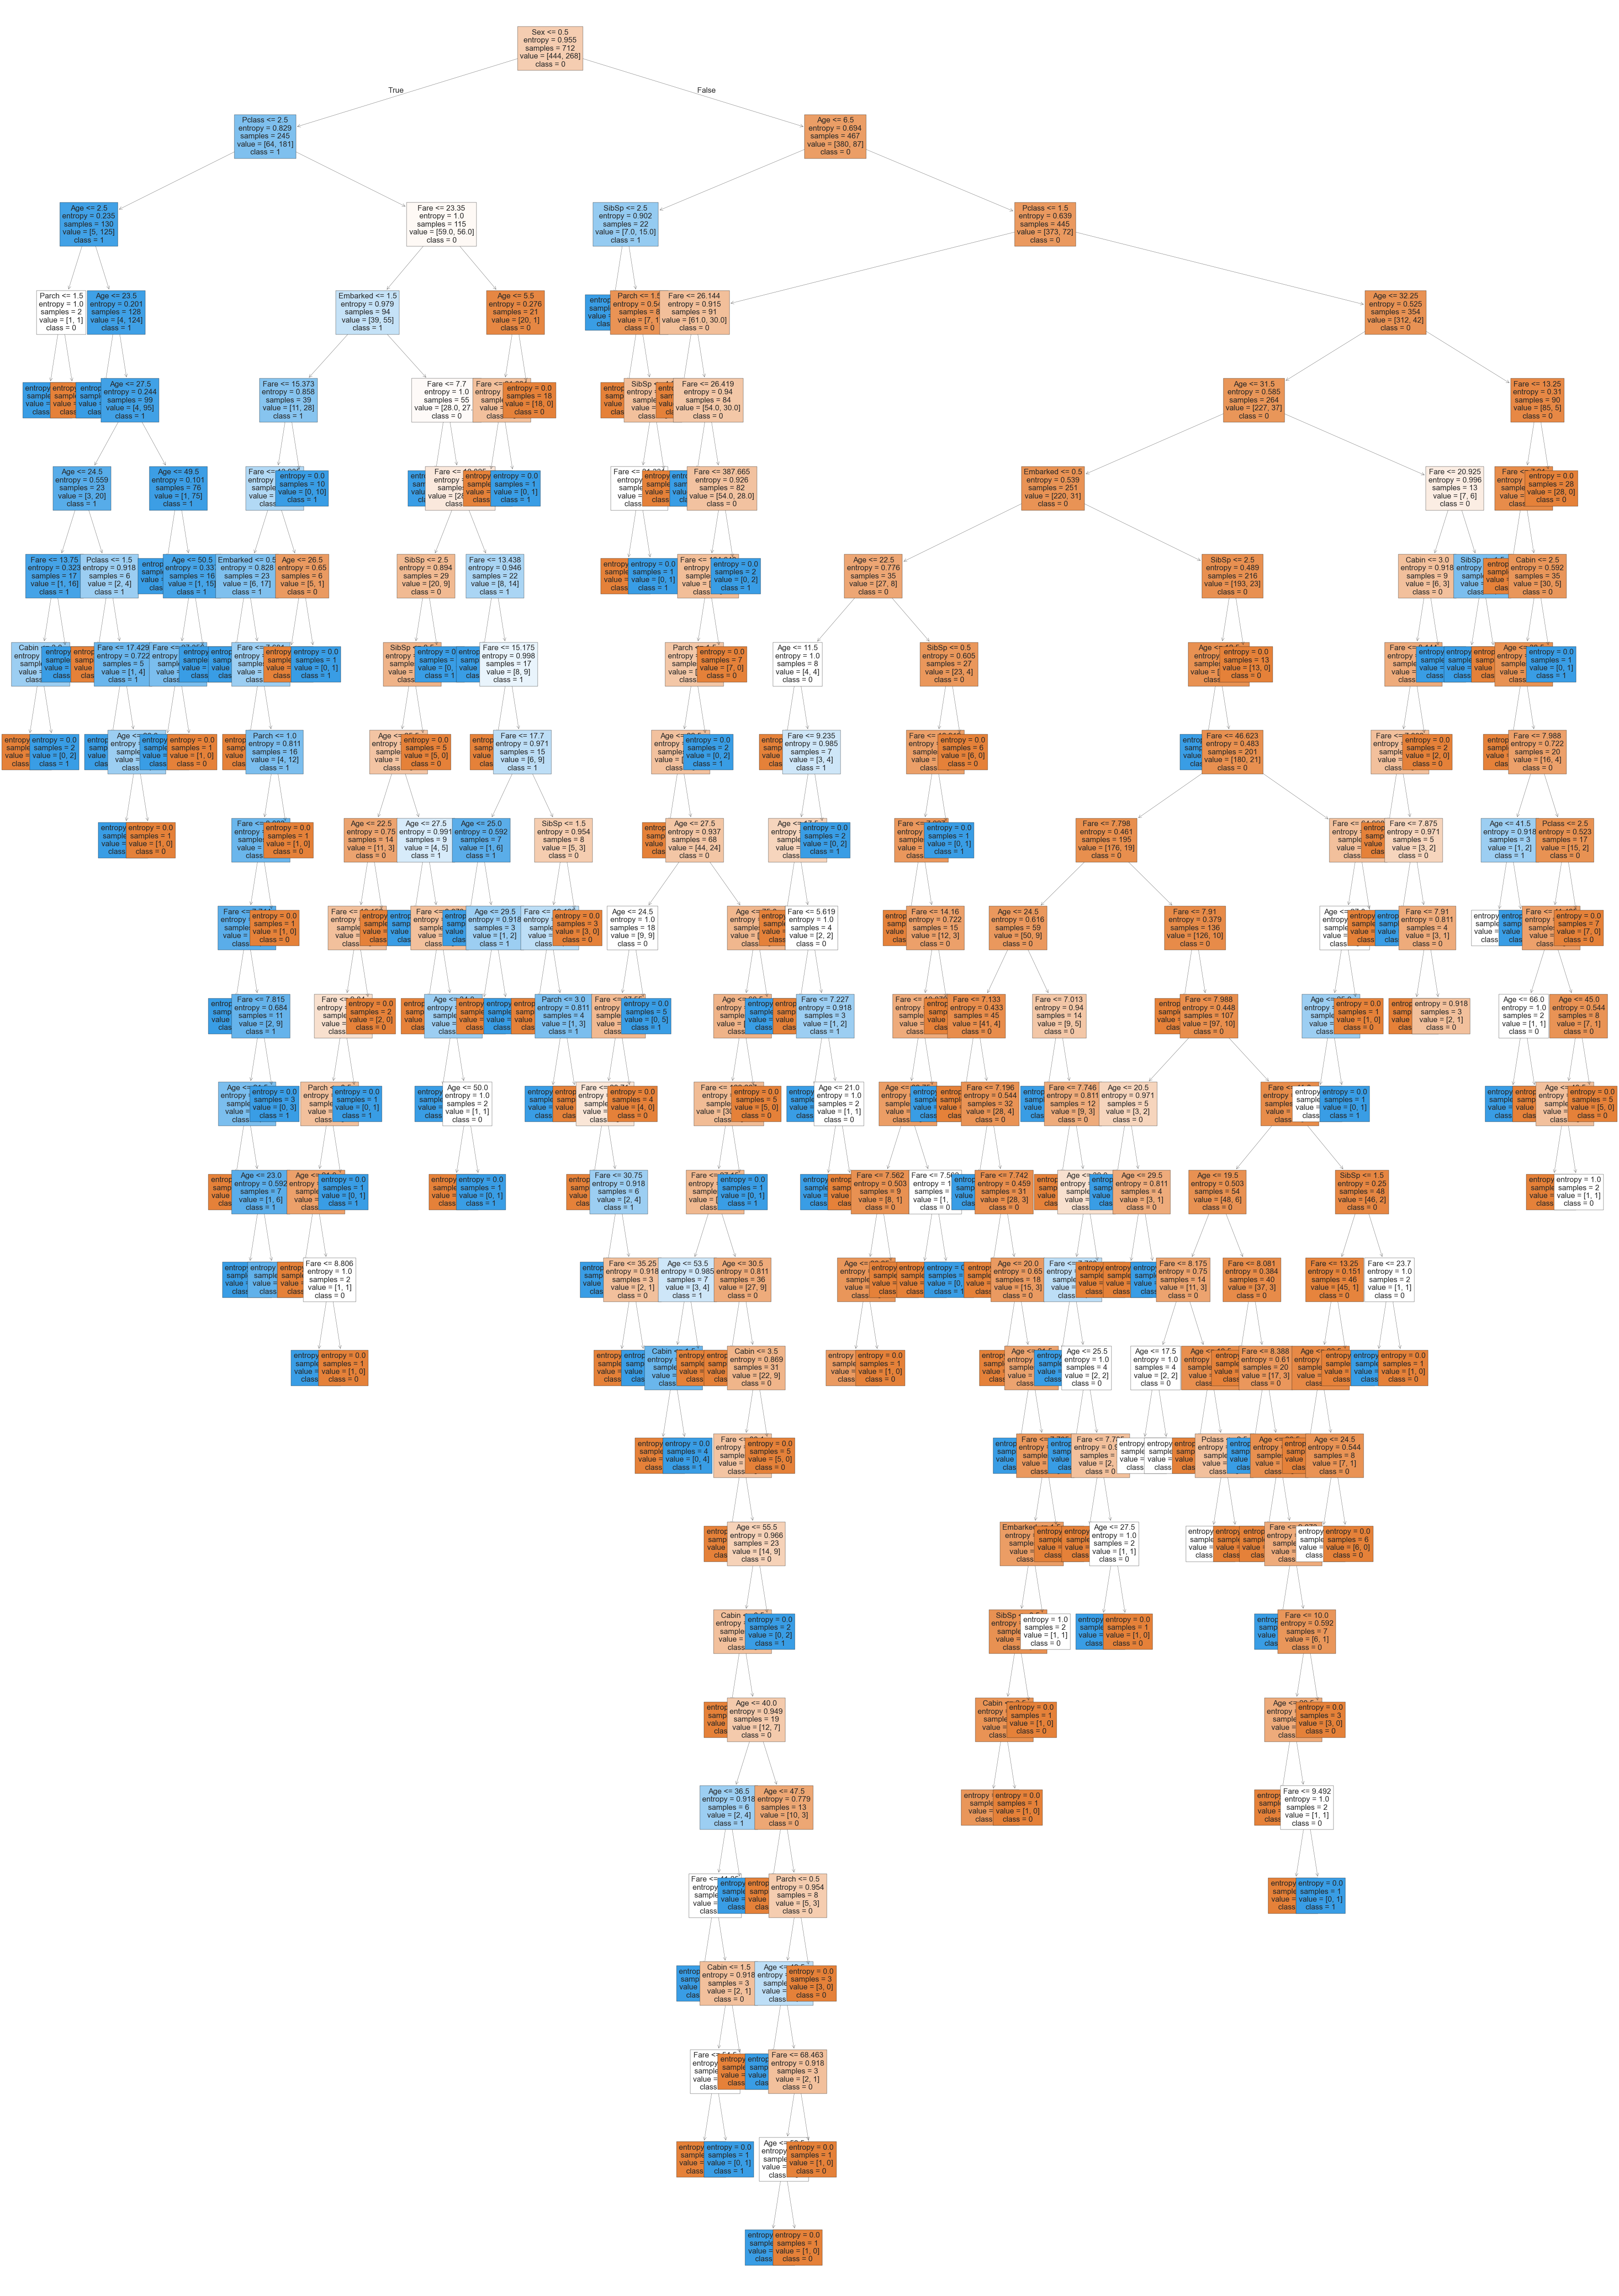

In [140]:
previsores = x_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(45,65))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True, fontsize=12);